In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Wennie test')

Wennie test


In [3]:
def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame
    df = pd.read_csv(file_name, sep = ',')
    return df

In [5]:
humidity= load_csv('/content/humidity.csv')
pressure= load_csv('/content/pressure.csv')
temperature= load_csv('/content/temperature.csv')
label= load_csv('/content/weather_description.csv')

In [6]:
humidity= humidity.drop(humidity.index[0])
# humidity.head(3)

In [7]:
pressure= pressure.drop(pressure.index[0])
# pressure.head(3)

In [8]:
temperature= temperature.drop(temperature.index[0])
# temperature.head(3)

In [9]:
label= label.drop(label.index[0])
# label.head(5)

In [10]:
all_col= ['Vancouver', 'Portland', 'San Francisco','Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba',	'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya',	'Jerusalem']
temperature[all_col]= temperature[all_col]-273.15
# temperature.head(3)

In [11]:
t1= pd.merge(left= pressure, right= temperature, on= 'datetime', suffixes=("_pressure", "_tempreture"))
# t1.head(10)

In [12]:
t2= pd.merge(left= t1, right=humidity, on= 'datetime')
# t2.head(10)
#_x= pressure, _y= temp, NULL= humidity

In [13]:
all_col= ['Vancouver', 'Portland', 'San Francisco','Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba',	'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya',	'Jerusalem']
all_col_hum= []
for col in all_col: 
    all_col_hum.append(col+ "_humidity")


for i in all_col:
    t2.rename(columns={i: all_col_hum[all_col.index(i)]}, inplace=True)


# t2.head(5)

In [14]:
t2= pd.merge(left= t2, right=label, on= 'datetime')
# t2.head(5)

In [15]:
seattle= t2[["Seattle_pressure", "Seattle_humidity", "Seattle_tempreture", "Seattle"]]
seattle = seattle.rename(columns={'Seattle_pressure': 'pressure', 'Seattle_tempreture':'tempreture', 'Seattle_humidity':'humidity','Seattle':'label'},)
# seattle.head(5)

In [16]:
portland= t2[["Portland_pressure", "Portland_humidity", "Portland_tempreture", "Portland"]]
portland = portland.rename(columns={'Portland_pressure': 'pressure', 'Portland_tempreture':'tempreture', 'Portland_humidity':'humidity','Portland':'label'},)
# portland.head(5)

In [17]:
San_Diego= t2[["San Diego_pressure", "San Diego_humidity", "San Diego_tempreture", "San Diego"]]
San_Diego = San_Diego.rename(columns={'San Diego_pressure': 'pressure', 'San Diego_tempreture':'tempreture', 'San Diego_humidity':'humidity','San Diego':'label'},)
# San_Diego.head(5)

In [18]:
# seattle = seattle.append(portland, ignore_index= True )
seattle = pd.concat([seattle, portland], ignore_index= True )

In [19]:
# seattle = seattle.append(San_Diego, ignore_index= True )
seattle = pd.concat([seattle, San_Diego], ignore_index= True )

In [20]:
seattle.head()
#seattle['pressure'], seattle['tempreture'] = seattle['tempreture'], seattle['pressure']

,pressure,humidity,tempreture,label
0,1027.0,81.0,8.650000,sky is clear
1,1027.0,80.0,8.647217,sky is clear
2,1028.0,80.0,8.639833,sky is clear
3,1028.0,79.0,8.632449,sky is clear
4,1029.0,79.0,8.625065,sky is clear


In [22]:
seattle["label"][0]

'sky is clear'

In [23]:
seattle["label"].value_counts()

sky is clear                    39355
light rain                      17126
broken clouds                   17022
overcast clouds                 14328
mist                            12019
scattered clouds                10159
few clouds                       9799
moderate rain                    4947
haze                             4225
fog                              2461
light intensity drizzle          1810
heavy intensity rain             1448
smoke                             532
light snow                        130
drizzle                            71
light intensity shower rain        66
proximity thunderstorm             53
very heavy rain                    48
snow                               43
thunderstorm                       29
dust                               16
heavy snow                         13
thunderstorm with light rain       13
squalls                            11
freezing rain                      11
thunderstorm with rain              7
heavy intens

In [24]:
# test 
new_df = seattle
new_df = seattle[['tempreture', 'humidity', 'pressure','label']]

In [25]:
new_df.head()

,tempreture,humidity,pressure,label
0,8.650000,81.0,1027.0,sky is clear
1,8.647217,80.0,1027.0,sky is clear
2,8.639833,80.0,1028.0,sky is clear
3,8.632449,79.0,1028.0,sky is clear
4,8.625065,79.0,1029.0,sky is clear


In [26]:
new_df = new_df.dropna() #remove empty rows

#Convert each category into an interger
for ind in new_df.index:
  if new_df["label"][ind]=='overcast clouds':
    new_df["label"][ind] = 0
  elif new_df["label"][ind]=='sky is clear':
    new_df["label"][ind] = 1
  elif new_df["label"][ind]=='light rain':
    new_df["label"][ind] = 2
  #elif new_df["Seattle"][ind]=='Drizzle':
  #  new_df["Seattle"][ind] = 2
  else:
    new_df = new_df.drop([ind]) #we don't consider other classes so we drop it

#Cast this column to int
new_df["label"] = new_df["label"].astype(int)

new_df.head() #show the 5 first rows of the dataframe

Streaming output truncated to the last 5000 lines.
<ipython-input-26-d0c1eb942233>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["label"][ind] = 0
<ipython-input-26-d0c1eb942233>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["label"][ind] = 0
<ipython-input-26-d0c1eb942233>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["label"][ind] = 0
<ipython-input-26-d0c1eb942233>:6: SettingWithCopyWarning: 
A value is

,tempreture,humidity,pressure,label
0,8.650000,81.0,1027.0,1
1,8.647217,80.0,1027.0,1
2,8.639833,80.0,1028.0,1
3,8.632449,79.0,1028.0,1
4,8.625065,79.0,1029.0,1


In [27]:
# build the model

import tensorflow as tf

In [77]:
#Parameters :
NB_classes = 3 #number of outputs
NB_neurones = 30 #main number of neurones
NB_features = 3 #number of inputs
activation_func = tf.keras.activations.relu #activation function used

#Densly connected neural network
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(9,activation=activation_func,input_shape=(NB_features,)),
                             tf.keras.layers.Dense(27,activation=activation_func),
                             tf.keras.layers.Dense(NB_classes,activation=tf.keras.activations.softmax)
])

model.compile(optimizer="adam",loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy']) #compile the model
# model.build()
model.summary() #to see the paramter of our model


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 36        
                                                                 
 dense_10 (Dense)            (None, 27)                270       
                                                                 
 dense_11 (Dense)            (None, 3)                 84        
                                                                 
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [78]:
new_df["label"].value_counts()

1    38898
2    17022
0    14222
Name: label, dtype: int64

In [79]:
label_to_drop = new_df[new_df['label'] == 1].index


drop_samples = np.random.choice(label_to_drop, 20000, replace=False)
 

df_dropped = new_df.drop(drop_samples)

In [80]:
df_dropped["label"].value_counts()

1    18898
2    17022
0    14222
Name: label, dtype: int64

In [81]:
from keras.utils import to_categorical

labels = to_categorical(df_dropped.pop('label')) #Create classes from the labels

import numpy as np #import numpy library, used for arithmetic

features = np.array(df_dropped) #convert our dataframe into ndarray, only array type that neural network takes as input

In [82]:
df_dropped.head()

,tempreture,humidity,pressure
0,8.650000,81.0,1027.0
3,8.632449,79.0,1028.0
28,14.820000,58.0,1027.0
29,17.460000,63.0,1025.0
33,22.030000,38.0,1023.0


In [83]:
from sklearn.model_selection import train_test_split


#Split the dataset into training set 85% and test set 15%
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20,shuffle=True) 

In [84]:
model_history = model.fit(x=train_features,
          y=train_labels,
          epochs=200,
          validation_data=(test_features,test_labels),
          verbose=1,
          shuffle=True) #Train our model

Epoch 1/200
1254/1254 [==============================] - 3s 2ms/step - loss: 6.7176 - accuracy: 0.4363 - val_loss: 0.9871 - val_accuracy: 0.5065
Epoch 2/200
1254/1254 [==============================] - 2s 2ms/step - loss: 1.3300 - accuracy: 0.4470 - val_loss: 1.2612 - val_accuracy: 0.4201
Epoch 3/200
1254/1254 [==============================] - 3s 2ms/step - loss: 1.2882 - accuracy: 0.4471 - val_loss: 3.4179 - val_accuracy: 0.3766
Epoch 4/200
1254/1254 [==============================] - 3s 2ms/step - loss: 1.3100 - accuracy: 0.4488 - val_loss: 1.4653 - val_accuracy: 0.3349
Epoch 5/200
1254/1254 [==============================] - 3s 2ms/step - loss: 1.2736 - accuracy: 0.4509 - val_loss: 1.0859 - val_accuracy: 0.4969
Epoch 6/200
1254/1254 [==============================] - 2s 2ms/step - loss: 1.2802 - accuracy: 0.4473 - val_loss: 1.6132 - val_accuracy: 0.3887
Epoch 7/200
1254/1254 [==============================] - 2s 2ms/step - loss: 1.2632 - accuracy: 0.4462 - val_loss: 1.1274 - val_ac

In [45]:
model_history = model.fit(x=train_features,
          y=train_labels,
          epochs=3,
          validation_data=(test_features,test_labels),
          verbose=1,
          shuffle=True) #Train our model

Epoch 1/3
1254/1254 [==============================] - 2s 2ms/step - loss: 0.9385 - accuracy: 0.5350 - val_loss: 0.9378 - val_accuracy: 0.5442
Epoch 2/3
1254/1254 [==============================] - 2s 2ms/step - loss: 0.9382 - accuracy: 0.5379 - val_loss: 0.9389 - val_accuracy: 0.5380
Epoch 3/3
1254/1254 [==============================] - 2s 2ms/step - loss: 0.9397 - accuracy: 0.5368 - val_loss: 0.9394 - val_accuracy: 0.5415


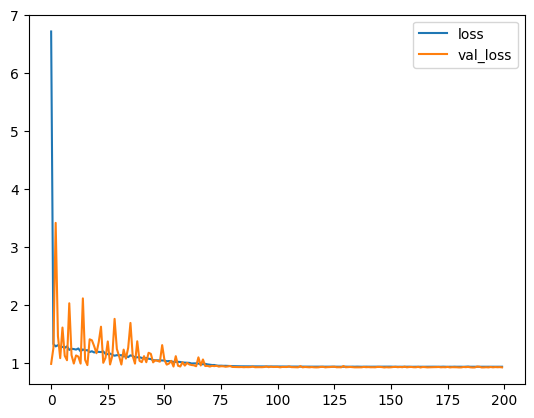

In [87]:
metrics = model_history.history

import matplotlib.pyplot as plt

plt.plot(model_history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


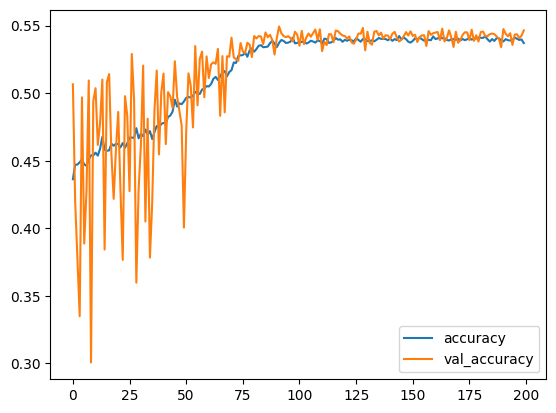

In [88]:
plt.plot(model_history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [89]:
performance=model.evaluate(test_features,test_labels, batch_size=32, verbose=1, steps=None, )[1] * 100
print('Final accuracy : ', round(performance), '%')

314/314 [==============================] - 0s 1ms/step - loss: 0.9267 - accuracy: 0.5464
Final accuracy :  55 %


In [90]:
model.save("model.h5")

import os
model_size = os.stat('model.h5')
print("Size of model before quantizing: {} bytes".format(model_size.st_size))

Size of model before quantizing: 36288 bytes


In [91]:
test_labels = np.argmax(test_labels,axis=1)
print(test_labels)

[2 1 0 ... 0 0 2]


In [92]:
# Passing the baseline Keras model to the TF Lite Converter.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Using  the Dynamic Range Quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Converting the model
tflite_quant_model = converter.convert()
# Saving the model.
with open('dynamic_quant_model.tflite', 'wb') as f:
    f.write(tflite_quant_model)

In [63]:
#Function for evaluating TF Lite Model over Test Images
def evaluate(interpreter):
    prediction= []
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    input_format = interpreter.get_output_details()[0]['dtype']
    
    for i, test_image in enumerate(test_features):
        if i % 100 == 0:
            print('Evaluated on {n} results so far.'.format(n=i))
        test_image = np.expand_dims(test_image, axis=0).astype(input_format)
        interpreter.set_tensor(input_index, test_image)

        # Run inference.
        interpreter.invoke()
        output = interpreter.tensor(output_index)
        predicted_label = np.argmax(output()[0])
        prediction.append(predicted_label)

    print('\n')
    # Comparing prediction results with ground truth labels to calculate accuracy.
    prediction = np.array(prediction)
    print(prediction)
    print(test_labels)
    #accuracy = (prediction == test_labels)
    accuracy = (prediction == test_labels).mean()
    return accuracy

In [93]:
# Passing the Dynamic Range Quantized TF Lite model to the Interpreter.
interpreter = tf.lite.Interpreter('dynamic_quant_model.tflite') 
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test images.
test_accuracy = evaluate(interpreter)
print('Dynamically Quantized TFLite Model Test Accuracy:', test_accuracy*100)
#print('Baseline Keras Model Test Accuracy:', baseline_model_accuracy*100)

Evaluated on 0 results so far.
Evaluated on 100 results so far.
Evaluated on 200 results so far.
Evaluated on 300 results so far.
Evaluated on 400 results so far.
Evaluated on 500 results so far.
Evaluated on 600 results so far.
Evaluated on 700 results so far.
Evaluated on 800 results so far.
Evaluated on 900 results so far.
Evaluated on 1000 results so far.
Evaluated on 1100 results so far.
Evaluated on 1200 results so far.
Evaluated on 1300 results so far.
Evaluated on 1400 results so far.
Evaluated on 1500 results so far.
Evaluated on 1600 results so far.
Evaluated on 1700 results so far.
Evaluated on 1800 results so far.
Evaluated on 1900 results so far.
Evaluated on 2000 results so far.
Evaluated on 2100 results so far.
Evaluated on 2200 results so far.
Evaluated on 2300 results so far.
Evaluated on 2400 results so far.
Evaluated on 2500 results so far.
Evaluated on 2600 results so far.
Evaluated on 2700 results so far.
Evaluated on 2800 results so far.
Evaluated on 2900 results 

In [ ]:
# C++ file

In [ ]:
#MODEL_TFLITE = 'dynamic_quant_model.tflite'
#input_file = "dynamic_quant_model.tflite"

#dynamic_quant_model = tf.keras.models.load_model(input_file)

#converter = tf.lite.TFLiteConverter.from_keras_model(dynamic_quant_model) #create a converter

#tflite_model = converter.convert() #convert the model without quantization (for one of the next video)


#open("/content/tflite_model.tflite","wb").write(tflite_model) #Create a file containing our tflite model

OSError: ignored

In [65]:
!apt-get install -qq xxd #installing the tool

In [ ]:
#import files

In [66]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat /content/dynamic_quant_model.tflite | xxd -i >> /content/model.h #create an hexadecimal array containing all our parameters
!echo "};" >> /content/model.h

#files.download("/content/model.h") #automaticly download your file

In [ ]:
!apt-get install -qq xxd #installing the tool

In [67]:
MODEL_TFLITE = 'dynamic_quant_model.tflite'
MODEL_TFLITE_MICRO = 'model.cpp'
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
REPLACE_TEXT = MODEL_TFLITE.replace('/','_').replace('.', '_')
!sed -i 's/{REPLACE_TEXT}/g_model/g' {MODEL_TFLITE_MICRO}